<a href="https://colab.research.google.com/github/anacarolcarrascoconsultorias-lab/IBM-Data-Science-Assignments/blob/main/Lab_17_Data_Visualization_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Histogram**


Estimated time needed: **45** minutes


In this lab, you will focus on the visualization of data. The dataset will be provided through an RDBMS, and you will need to use SQL queries to extract the required data.


## Objectives


In this lab, you will perform the following:


- Visualize the distribution of data using histograms.

- Visualize relationships between features.

- Explore data composition and comparisons.


## Demo: Working with database


#### Download the database file.


In [1]:
!wget -O survey-data.sqlite https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite

--2025-12-08 11:05:18--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 198.23.119.245
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|198.23.119.245|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 211415040 (202M) [application/octet-stream]
Saving to: ‘survey-data.sqlite’

survey-data.sqlite  100%[===================>] 201.62M  71.9MB/s    in 2.8s    

2025-12-08 11:05:21 (71.9 MB/s) - ‘survey-data.sqlite’ saved [211415040/211415040]



#### Install the required libraries and import them


In [2]:
!pip install pandas

In [3]:
!pip install matplotlib

In [4]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

#### Connect to the SQLite database


In [5]:
conn = sqlite3.connect('survey-data.sqlite')

## Demo: Basic SQL queries

**Demo 1: Count the number of rows in the table**


In [6]:
QUERY = "SELECT COUNT(*) FROM main"
df = pd.read_sql_query(QUERY, conn)
print(df)


   COUNT(*)
0     65437


**Demo 2: List all tables**


In [7]:
QUERY = """
SELECT name as Table_Name
FROM sqlite_master
WHERE type = 'table'
"""
pd.read_sql_query(QUERY, conn)


,Table_Name
0,main


**Demo 3: Group data by age**


In [8]:
QUERY = """
SELECT Age, COUNT(*) as count
FROM main
GROUP BY Age
ORDER BY Age
"""
df_age = pd.read_sql_query(QUERY, conn)
print(df_age)


                  Age  count
0     18-24 years old  14098
1     25-34 years old  23911
2     35-44 years old  14942
3     45-54 years old   6249
4     55-64 years old   2575
5   65 years or older    772
6   Prefer not to say    322
7  Under 18 years old   2568


## Hands-on Lab: Visualizing Data with Histograms


### 1. Visualizing the distribution of data (Histograms)


**1.1 Histogram of `CompTotal` (Total Compensation)**


Objective: Plot a histogram of `CompTotal` to visualize the distribution of respondents' total compensation.


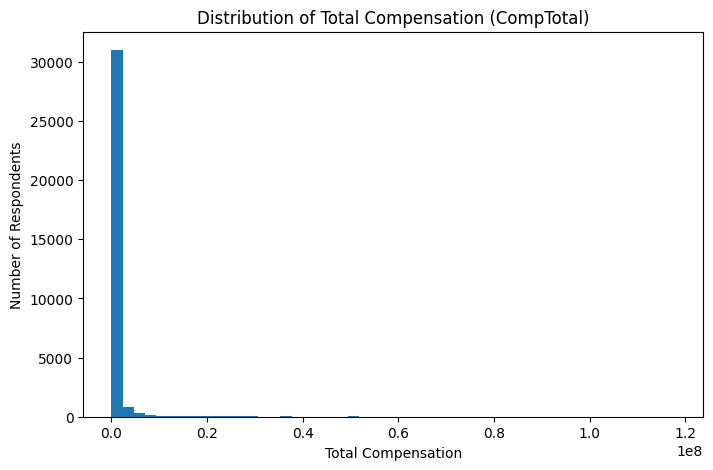

In [9]:
## Write your code here
## 1.1 Histogram of CompTotal (Total Compensation)

# 1) Get CompTotal from the SQLite database
QUERY = """
SELECT CompTotal
FROM main
WHERE CompTotal IS NOT NULL
"""
df_clean = pd.read_sql_query(QUERY, conn)

# 2) Convert CompTotal to numeric
#    - errors="coerce" turns invalid strings into NaN
df_clean["CompTotal"] = pd.to_numeric(df_clean["CompTotal"], errors="coerce")

# 3) Drop rows where CompTotal is missing after conversion
df_clean = df_clean.dropna(subset=["CompTotal"])

# 4) Keep only positive compensation values
df_clean = df_clean[df_clean["CompTotal"] > 0]

# 5) Remove extreme outliers (similar idea to Lab 16)
lower = df_clean["CompTotal"].quantile(0.01)   # 1st percentile
upper = df_clean["CompTotal"].quantile(0.99)   # 99th percentile

df_clean_filtered = df_clean[
    (df_clean["CompTotal"] >= lower) &
    (df_clean["CompTotal"] <= upper)
]

# 6) Plot the histogram
plt.figure(figsize=(8, 5))
plt.hist(df_clean_filtered["CompTotal"], bins=50)
plt.title("Distribution of Total Compensation (CompTotal)")
plt.xlabel("Total Compensation")
plt.ylabel("Number of Respondents")
plt.show()


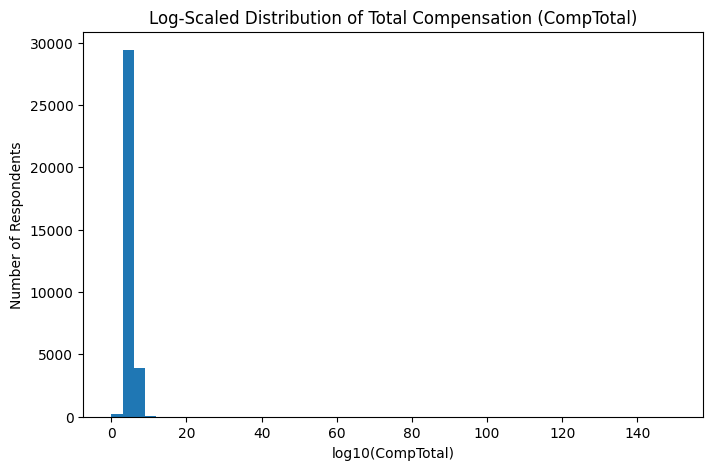

In [10]:
## 1.1B Histogram of CompTotal (Log Transformed)

import numpy as np

# Use the same cleaned dataframe: df_clean from before

df_clean_log = df_clean[df_clean["CompTotal"] > 0].copy()
df_clean_log["log_CompTotal"] = np.log10(df_clean_log["CompTotal"])

plt.figure(figsize=(8, 5))
plt.hist(df_clean_log["log_CompTotal"], bins=50)
plt.title("Log-Scaled Distribution of Total Compensation (CompTotal)")
plt.xlabel("log10(CompTotal)")
plt.ylabel("Number of Respondents")
plt.show()


In [12]:
df_comp_clean = df_clean.copy()
df_comp_clean[df_comp_clean["CompTotal"] > 2_000_000].head(20)
df_comp_clean[df_comp_clean["CompTotal"] < 0].head(20)
invalid_high = df_comp_clean[df_comp_clean["CompTotal"] > 2_000_000].shape[0]
invalid_low = df_comp_clean[df_comp_clean["CompTotal"] < 0].shape[0]
invalid_high, invalid_low


(2428, 0)

In [13]:
# Create cleaned version
df_comp_clean["CompTotalClean"] = df_comp_clean["CompTotal"]

# Remove impossible values
df_comp_clean.loc[(df_comp_clean["CompTotalClean"] <= 0) |
             (df_comp_clean["CompTotalClean"] > 1_000_000),
             "CompTotalClean"] = np.nan

# Fill missing or invalid with median
median_comp = df_comp_clean["CompTotalClean"].median()
df_comp_clean["CompTotalClean"] = df_comp_clean["CompTotalClean"].fillna(median_comp)


In [14]:
df_comp_clean["CompTotal"].sort_values(ascending=False).head(50)


,CompTotal
8262,1.000000e+150
19906,1.000000e+65
9929,1.000000e+53
5109,1.000000e+44
11579,8.000000e+27
14577,1.000000e+20
15957,1.111111e+15
29641,3.040302e+14
26850,7.587459e+13
32648,7.777778e+12


In [15]:
df_comp_clean[df_comp_clean["CompTotal"] > 2_000_000].shape[0]


2428

In [16]:
df_comp_clean[df_comp_clean["CompTotal"] > 2_000_000].head(20)


,CompTotal,CompTotalClean
0,2.040000e+06,96000.0
39,9.000000e+09,96000.0
44,6.000000e+06,96000.0
51,4.000000e+06,96000.0
121,1.000000e+11,96000.0
142,4.000000e+06,96000.0
151,5.000000e+06,96000.0
159,3.600000e+06,96000.0
168,8.000000e+06,96000.0
241,3.500000e+06,96000.0


In [17]:
df_comp_clean["CompTotalClean"] = df_comp_clean["CompTotal"].copy()

# Remove corrupted high or impossible values
df_comp_clean.loc[
    (df_comp_clean["CompTotalClean"] > 1_000_000) |
    (df_comp_clean["CompTotalClean"] <= 0),
    "CompTotalClean"
] = np.nan


In [18]:
df_comp_clean["CompTotalClean"].isna().sum()


np.int64(3772)

<Axes: >

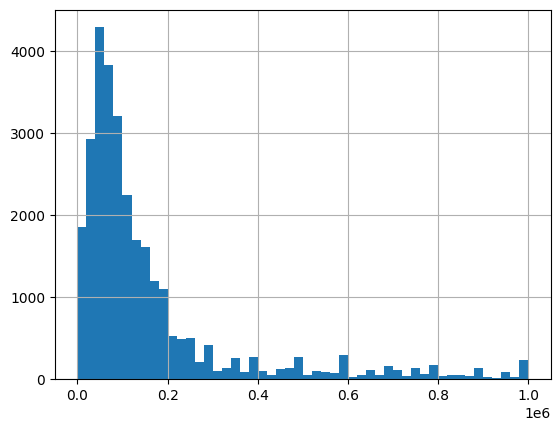

In [19]:
df_comp_clean["CompTotalClean"].describe()
df_comp_clean["CompTotalClean"].hist(bins=50)


In [20]:
df_comp_clean["CompTotalClean"].describe()


,CompTotalClean
count,29841.000000
mean,162648.429577
std,193224.163787
min,1.000000
25%,54500.000000
50%,96000.000000
75%,175500.000000
max,1000000.000000


In [21]:
df_comp_clean["CompTotalClean"].value_counts().head(20)


,count
CompTotalClean,
100000.0,939
60000.0,839
120000.0,793
80000.0,728
50000.0,705
150000.0,660
70000.0,624
200000.0,608
90000.0,558


In [23]:
df_comp_clean.loc[df_comp_clean["CompTotalClean"] < 5000, "CompTotalClean"] = median_comp


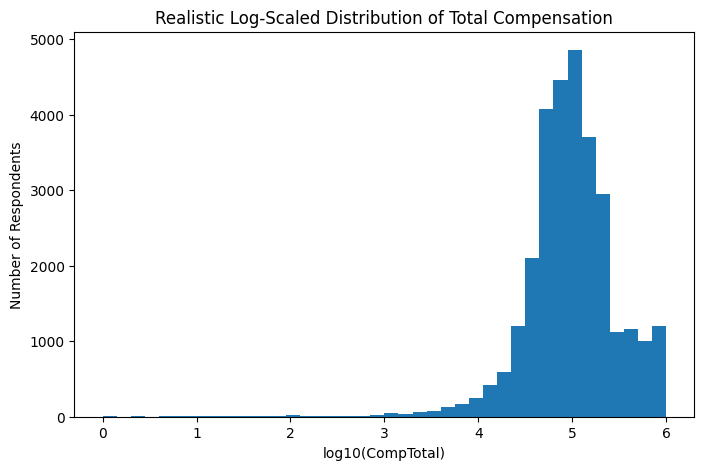

In [24]:
## 1.1C Cleaned + Log-Scaled Histogram (Realistic Compensation Range)

import numpy as np

# Work from the original cleaned df_comp (numeric + positive)
df_comp_clean = df_comp.copy()

# Apply realistic bounds (1 to 1,000,000)
df_comp_clean = df_comp_clean[
    (df_comp_clean["CompTotal"] >= 1) &
    (df_comp_clean["CompTotal"] <= 1_000_000)
]

# Log transform
df_comp_clean["log_CompTotal"] = np.log10(df_comp_clean["CompTotal"])

plt.figure(figsize=(8, 5))
plt.hist(df_comp_clean["log_CompTotal"], bins=40)
plt.title("Realistic Log-Scaled Distribution of Total Compensation")
plt.xlabel("log10(CompTotal)")
plt.ylabel("Number of Respondents")
plt.show()

**1.2 Histogram of YearsCodePro (Years of Professional Coding Experience)**


Objective: Plot a histogram of `YearsCodePro` to analyze the distribution of coding experience among respondents.


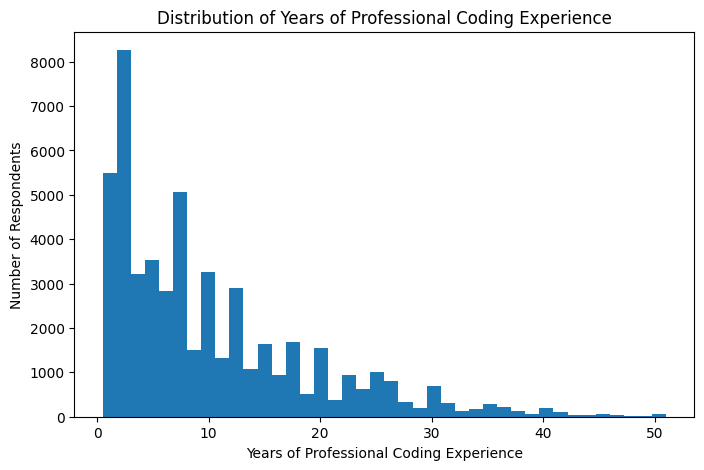

In [25]:
## Write your code here
## 1.2 Histogram of YearsCodePro

# 1) Extract column from DB
QUERY = """
SELECT YearsCodePro
FROM main
WHERE YearsCodePro IS NOT NULL
"""
df_years = pd.read_sql_query(QUERY, conn)

# 2) Replace text responses with numeric equivalents
df_years["YearsCodePro_clean"] = (
    df_years["YearsCodePro"]
        .replace({
            "Less than 1 year": 0.5,
            "More than 50 years": 51,
            "0": 0,
            "None": None,
            "NA": None
        })
)

# 3) Convert to numeric
df_years["YearsCodePro_num"] = pd.to_numeric(
    df_years["YearsCodePro_clean"],
    errors="coerce"
)

# 4) Drop missing after conversion
df_years = df_years.dropna(subset=["YearsCodePro_num"])

# 5) Remove impossible values
df_years = df_years[
    (df_years["YearsCodePro_num"] >= 0) &
    (df_years["YearsCodePro_num"] <= 60)
]

# 6) Plot histogram
plt.figure(figsize=(8, 5))
plt.hist(df_years["YearsCodePro_num"], bins=40)
plt.title("Distribution of Years of Professional Coding Experience")
plt.xlabel("Years of Professional Coding Experience")
plt.ylabel("Number of Respondents")
plt.show()


### 2. Visualizing Relationships in Data


**2.1 Histogram Comparison of `CompTotal` by `Age` Group**


Objective: Use histograms to compare the distribution of CompTotal across different Age groups.


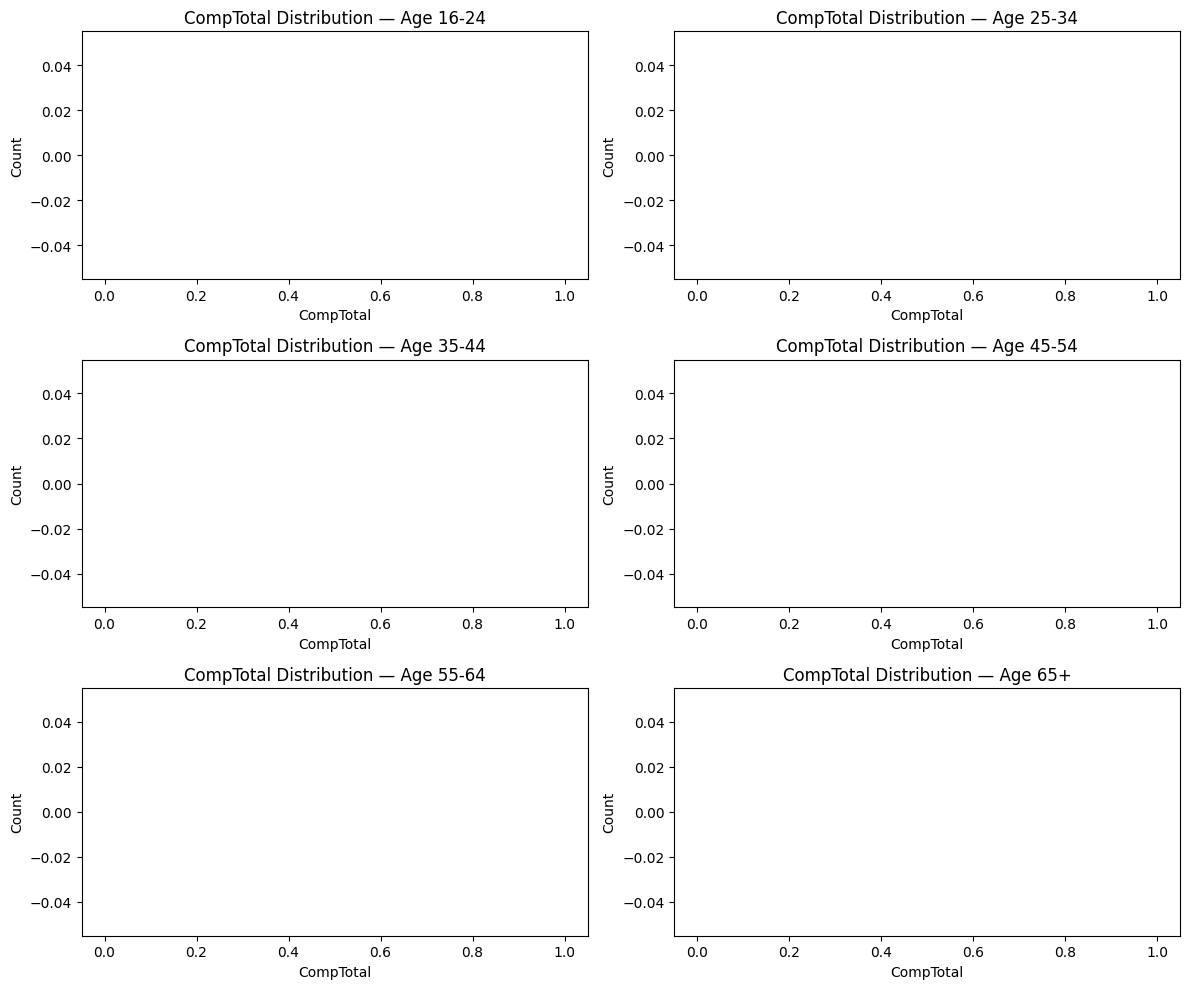

In [26]:
## Write your code here
## 2.1 Histogram Comparison of CompTotal by Age Group

# 1) Extract Age + CompTotal from DB
QUERY = """
SELECT Age, CompTotal
FROM main
WHERE Age IS NOT NULL AND CompTotal IS NOT NULL
"""
df_age_comp = pd.read_sql_query(QUERY, conn)

# 2) Clean Age column
df_age_comp["Age_clean"] = (
    df_age_comp["Age"]
        .replace({
            "Under 18": 17,
            "65 or older": 65,
            "NA": None,
            "Prefer not to say": None
        })
)

df_age_comp["Age_clean"] = pd.to_numeric(
    df_age_comp["Age_clean"], errors="coerce"
)

# Drop rows without numeric Age
df_age_comp = df_age_comp.dropna(subset=["Age_clean"])

# Keep only realistic age range
df_age_comp = df_age_comp[
    (df_age_comp["Age_clean"] >= 16) &
    (df_age_comp["Age_clean"] <= 80)
]

# 3) Clean CompTotal (same as Block 1C)
df_age_comp["CompTotal"] = pd.to_numeric(
    df_age_comp["CompTotal"], errors="coerce"
)

df_age_comp = df_age_comp.dropna(subset=["CompTotal"])
df_age_comp = df_age_comp[
    (df_age_comp["CompTotal"] >= 1) &
    (df_age_comp["CompTotal"] <= 1_000_000)
]

# 4) Create age bins
bins = [16, 25, 35, 45, 55, 65, 80]
labels = ["16-24", "25-34", "35-44", "45-54", "55-64", "65+"]

df_age_comp["AgeGroup"] = pd.cut(
    df_age_comp["Age_clean"], bins=bins, labels=labels, include_lowest=True
)

# 5) Plot histograms for each age group
plt.figure(figsize=(12, 10))

for i, group in enumerate(labels):
    plt.subplot(3, 2, i + 1)
    subset = df_age_comp[df_age_comp["AgeGroup"] == group]["CompTotal"]
    plt.hist(subset, bins=40)
    plt.title(f"CompTotal Distribution — Age {group}")
    plt.xlabel("CompTotal")
    plt.ylabel("Count")

plt.tight_layout()
plt.show()


In [27]:
# Diagnostic 1: How many rows after cleaning AGE?
print("Rows after numeric Age:", df_age_comp["Age_clean"].notna().sum())

# Diagnostic 2: How many rows after age-range filtering?
print("Rows between age 16 and 80:",
      df_age_comp[(df_age_comp["Age_clean"] >= 16) & (df_age_comp["Age_clean"] <= 80)].shape[0])

# Diagnostic 3: How many rows have valid CompTotal?
print("Rows with valid numeric CompTotal:",
      df_age_comp["CompTotal"].notna().sum())

# Diagnostic 4: How many rows fall inside salary bounds 1–1,000,000?
print("Rows within realistic salary range:",
      df_age_comp[
          (df_age_comp["CompTotal"] >= 1) &
          (df_age_comp["CompTotal"] <= 1_000_000)
      ].shape[0])

# Diagnostic 5: Count rows per AgeGroup after binning
print("\nRows per AgeGroup:")
print(df_age_comp["AgeGroup"].value_counts(dropna=False))


Rows after numeric Age: 0
Rows between age 16 and 80: 0
Rows with valid numeric CompTotal: 0
Rows within realistic salary range: 0

Rows per AgeGroup:
AgeGroup
16-24    0
25-34    0
35-44    0
45-54    0
55-64    0
65+      0
Name: count, dtype: int64


In [28]:
QUERY = """
SELECT Age
FROM main
WHERE Age IS NOT NULL
LIMIT 20
"""
pd.read_sql_query(QUERY, conn)


,Age
0,Under 18 years old
1,35-44 years old
2,45-54 years old
3,18-24 years old
4,18-24 years old
5,Under 18 years old
6,35-44 years old
7,18-24 years old
8,45-54 years old
9,35-44 years old


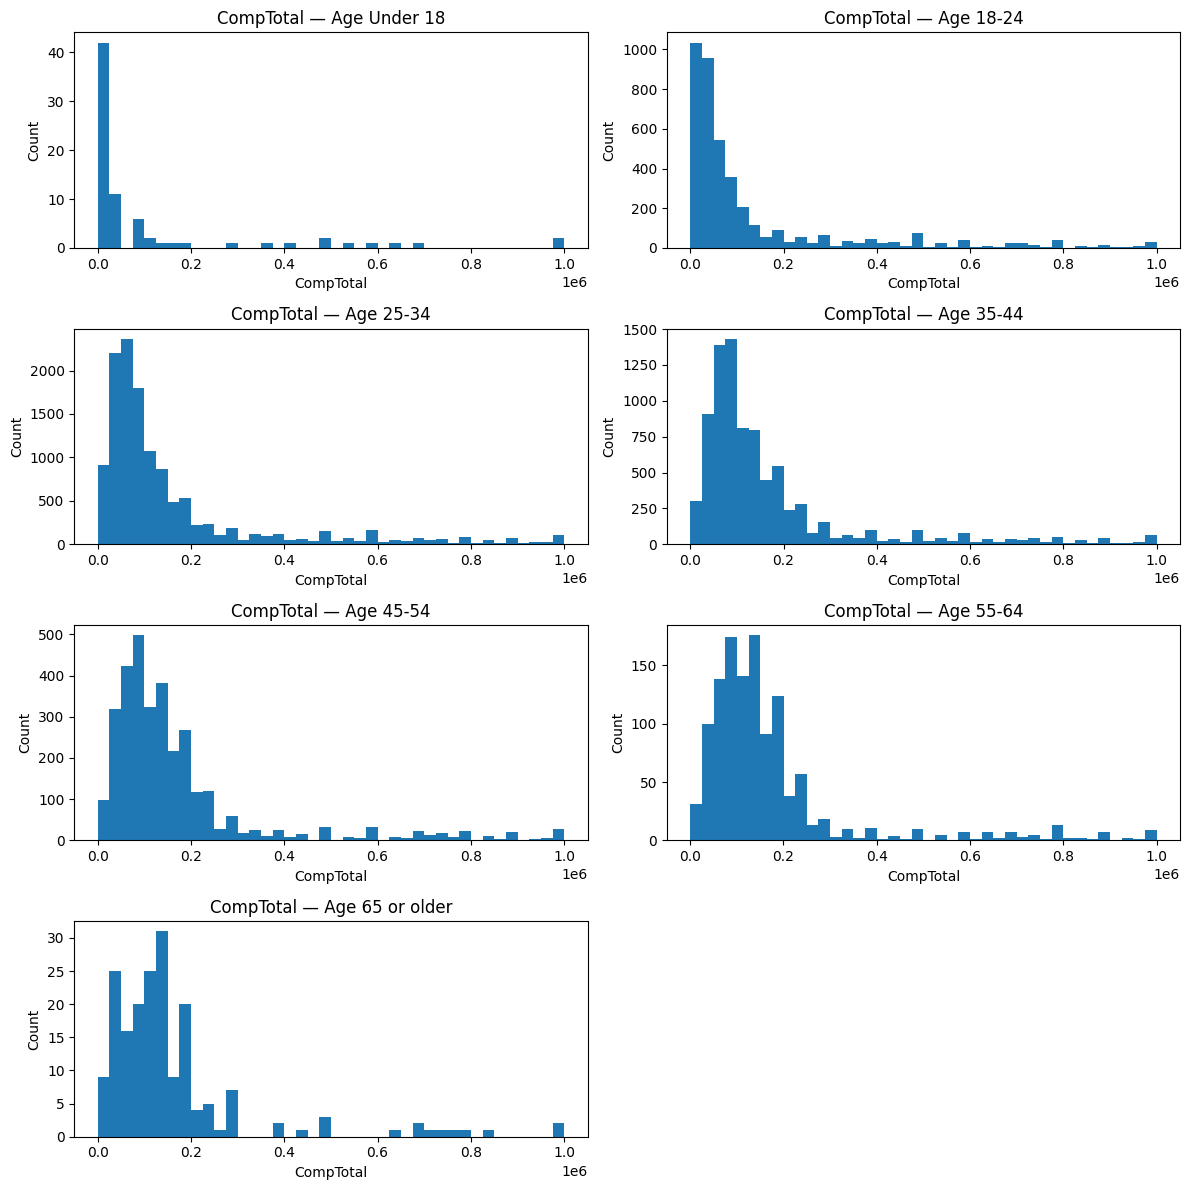

In [29]:
## 2.1 Histogram Comparison of CompTotal by Age Group (Fixed for categorical Age)

# 1) Extract Age + CompTotal
QUERY = """
SELECT Age, CompTotal
FROM main
WHERE Age IS NOT NULL AND CompTotal IS NOT NULL
"""
df_age_comp = pd.read_sql_query(QUERY, conn)

# 2) Clean Age values to standardized labels
df_age_comp["AgeGroup"] = (
    df_age_comp["Age"]
        .str.replace(" years old", "", regex=False)
        .str.replace(" years or older", "+", regex=False)
        .str.replace("Under 18", "Under 18", regex=False)
)

# Fix the "65 years or older" edge case
df_age_comp["AgeGroup"] = df_age_comp["AgeGroup"].replace({
    "65+": "65 or older"
})

# 3) Clean CompTotal
df_age_comp["CompTotal"] = pd.to_numeric(df_age_comp["CompTotal"], errors="coerce")
df_age_comp = df_age_comp.dropna(subset=["CompTotal"])

# Apply realistic salary bounds
df_age_comp = df_age_comp[
    (df_age_comp["CompTotal"] >= 1) &
    (df_age_comp["CompTotal"] <= 1_000_000)
]

# 4) Unique categories (sorted in logical order)
ordered_groups = [
    "Under 18",
    "18-24",
    "25-34",
    "35-44",
    "45-54",
    "55-64",
    "65 or older"
]

# 5) Plot histograms per age group
plt.figure(figsize=(12, 12))

for i, group in enumerate(ordered_groups):
    plt.subplot(4, 2, i + 1)
    subset = df_age_comp[df_age_comp["AgeGroup"] == group]["CompTotal"]

    if len(subset) > 0:
        plt.hist(subset, bins=40)

    plt.title(f"CompTotal — Age {group}")
    plt.xlabel("CompTotal")
    plt.ylabel("Count")

plt.tight_layout()
plt.show()


**2.2 Histogram of TimeSearching for Different Age Groups**


Objective: Use histograms to explore the distribution of `TimeSearching` (time spent searching for information) for respondents across different age groups.


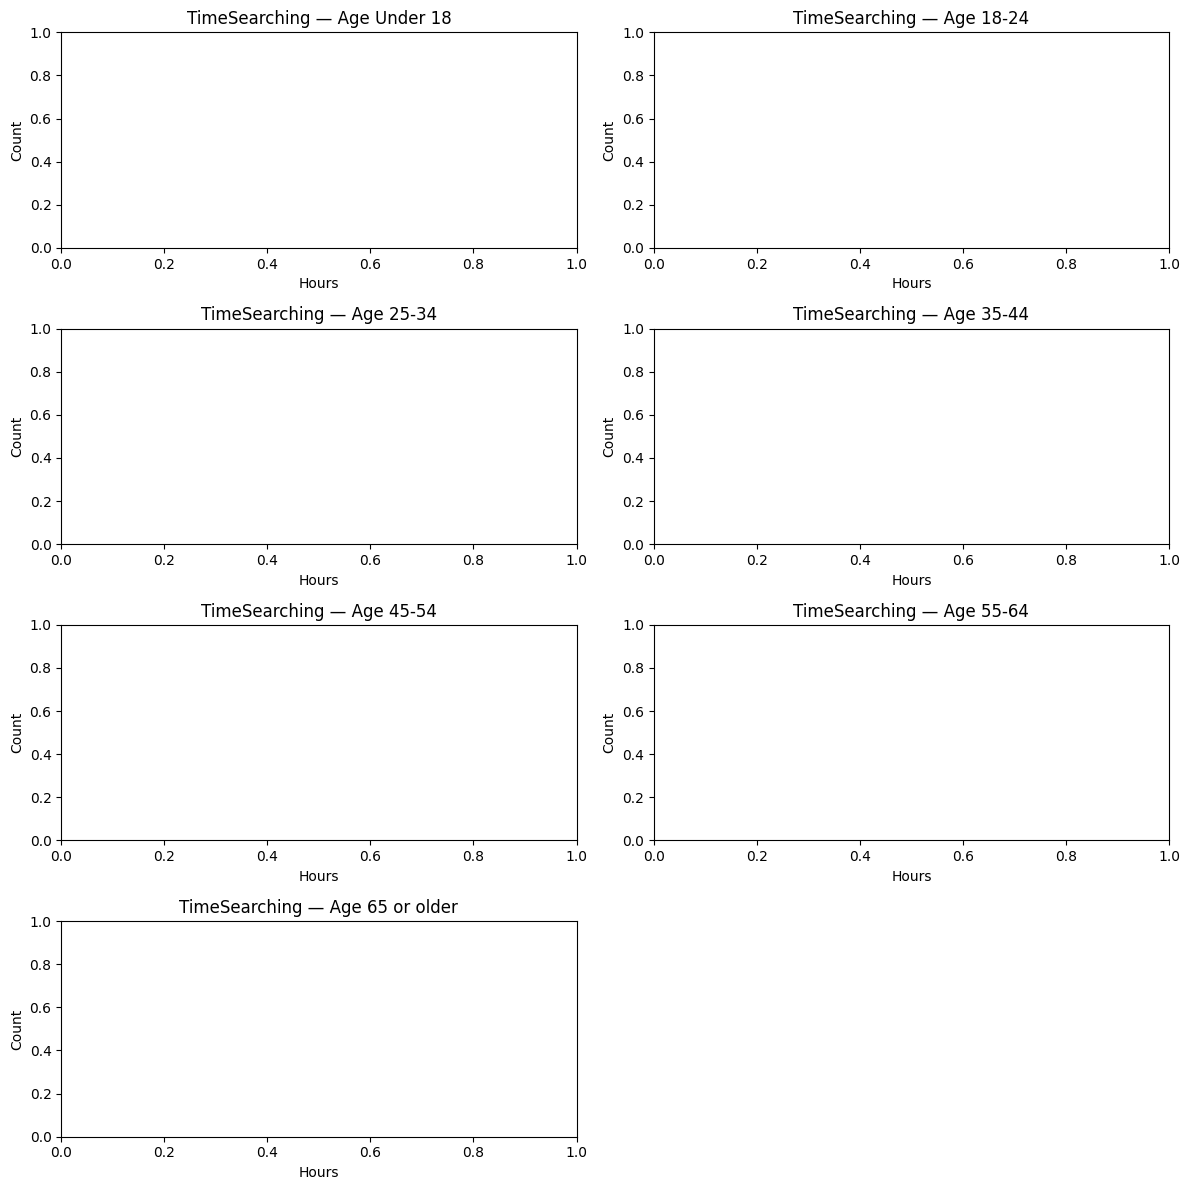

In [30]:
## Write your code here
## 2.2 Histogram of TimeSearching for Different Age Groups

# 1) Extract Age + TimeSearching
QUERY = """
SELECT Age, TimeSearching
FROM main
WHERE Age IS NOT NULL AND TimeSearching IS NOT NULL
"""
df_time = pd.read_sql_query(QUERY, conn)

# 2) Clean Age categories
df_time["AgeGroup"] = (
    df_time["Age"]
        .str.replace(" years old", "", regex=False)
        .str.replace(" years or older", "+", regex=False)
        .str.replace("Under 18", "Under 18", regex=False)
)

df_time["AgeGroup"] = df_time["AgeGroup"].replace({
    "65+": "65 or older"
})

# 3) Clean TimeSearching
# Replace common text responses with numeric estimates
df_time["TimeSearching_clean"] = (
    df_time["TimeSearching"]
        .replace({
            "Less than 1 hour": 0.5,
            "0-2 hours": 1,
            "3-5 hours": 4,
            "6-10 hours": 8,
            "Daily": 7,
            "I don't search": 0,
            "NA": None
        })
)

# Convert to numeric
df_time["TimeSearching_num"] = pd.to_numeric(
    df_time["TimeSearching_clean"], errors="coerce"
)

# Remove rows where conversion failed
df_time = df_time.dropna(subset=["TimeSearching_num"])

# Keep only reasonable values (0–50 hours/week)
df_time = df_time[
    (df_time["TimeSearching_num"] >= 0) &
    (df_time["TimeSearching_num"] <= 50)
]

# 4) Plot histograms for each age group
ordered_groups = [
    "Under 18",
    "18-24",
    "25-34",
    "35-44",
    "45-54",
    "55-64",
    "65 or older"
]

plt.figure(figsize=(12, 12))

for i, group in enumerate(ordered_groups):
    plt.subplot(4, 2, i + 1)
    subset = df_time[df_time["AgeGroup"] == group]["TimeSearching_num"]

    if len(subset) > 0:
        plt.hist(subset, bins=20)

    plt.title(f"TimeSearching — Age {group}")
    plt.xlabel("Hours")
    plt.ylabel("Count")

plt.tight_layout()
plt.show()


In [31]:
QUERY = """
SELECT TimeSearching
FROM main
WHERE TimeSearching IS NOT NULL
LIMIT 30
"""
pd.read_sql_query(QUERY, conn)


,TimeSearching
0,30-60 minutes a day
1,30-60 minutes a day
2,60-120 minutes a day
3,15-30 minutes a day
4,Less than 15 minutes a day
5,60-120 minutes a day
6,15-30 minutes a day
7,30-60 minutes a day
8,60-120 minutes a day
9,60-120 minutes a day


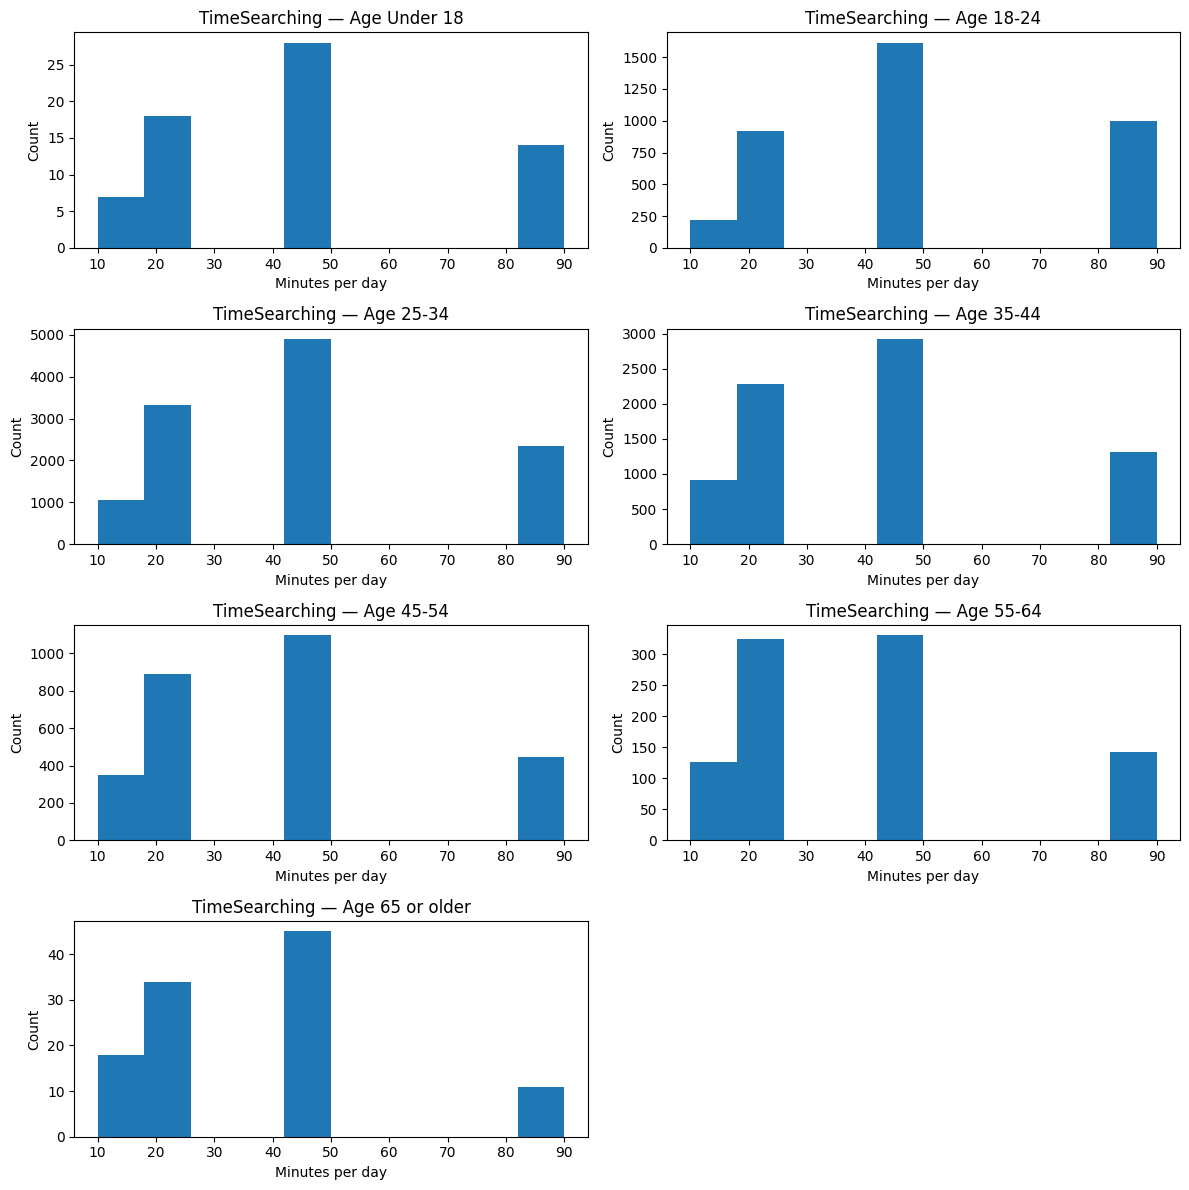

In [35]:
## 2.2 Histogram of TimeSearching for Different Age Groups (Corrected & Robust)

# 1) Extract Age + TimeSearching
QUERY = """
SELECT Age, TimeSearching
FROM main
WHERE Age IS NOT NULL AND TimeSearching IS NOT NULL
"""
df_time = pd.read_sql_query(QUERY, conn)

# 2) Clean Age categories (same logic as before)
df_time["AgeGroup"] = (
    df_time["Age"]
        .str.replace(" years old", "", regex=False)
        .str.replace(" years or older", "+", regex=False)
        .str.replace("Under 18", "Under 18", regex=False)
)

df_time["AgeGroup"] = df_time["AgeGroup"].replace({
    "65+": "65 or older"
})

# 3) Map TimeSearching text categories to numeric minutes per day
mapping = {
    "Less than 15 minutes a day": 10,
    "15-30 minutes a day": 22.5,
    "30-60 minutes a day": 45,
    "60-120 minutes a day": 90
}

# Use .map so anything not in mapping becomes NaN
df_time["TimeSearching_num"] = df_time["TimeSearching"].map(mapping)

# 4) Drop rows that were not mapped (NaN)
df_time = df_time.dropna(subset=["TimeSearching_num"])

# Ensure it's numeric (float)
df_time["TimeSearching_num"] = pd.to_numeric(
    df_time["TimeSearching_num"], errors="coerce"
)

# 5) Plot histograms per age group
ordered_groups = [
    "Under 18",
    "18-24",
    "25-34",
    "35-44",
    "45-54",
    "55-64",
    "65 or older"
]

plt.figure(figsize=(12, 12))

for i, group in enumerate(ordered_groups):
    plt.subplot(4, 2, i + 1)
    subset = df_time[df_time["AgeGroup"] == group]["TimeSearching_num"]

    if len(subset) > 0:
        plt.hist(subset.astype(float), bins=10)

    plt.title(f"TimeSearching — Age {group}")
    plt.xlabel("Minutes per day")
    plt.ylabel("Count")

plt.tight_layout()
plt.show()


### 3. Visualizing the Composition of Data


**3.1 Histogram of Most Desired Databases (`DatabaseWantToWorkWith`)**


Objective: Visualize the most desired databases for future learning using a histogram of the top 5 databases.


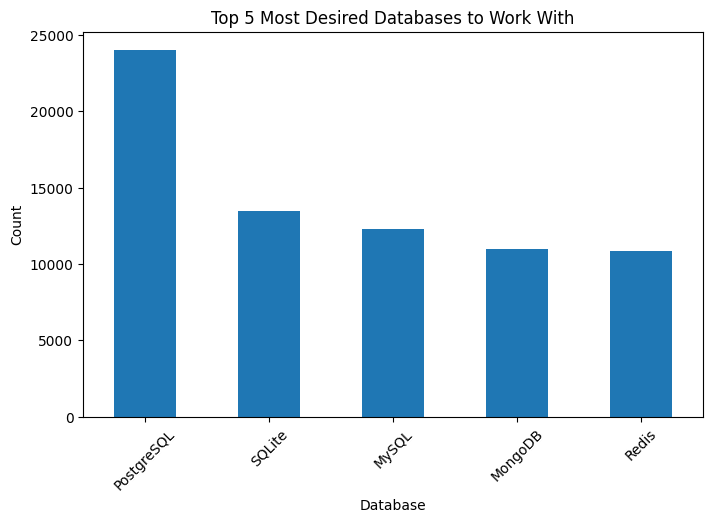

In [36]:
## Write your code here
## 3.1 Histogram of Most Desired Databases (Top 5)

# 1) Extract the column
QUERY = """
SELECT DatabaseWantToWorkWith
FROM main
WHERE DatabaseWantToWorkWith IS NOT NULL
"""
df_db = pd.read_sql_query(QUERY, conn)

# 2) Split multi-select fields (semicolon-separated)
df_db["Database_list"] = df_db["DatabaseWantToWorkWith"].str.split(";")

# 3) Expand into multiple rows
df_db_exploded = df_db.explode("Database_list")

# 4) Clean whitespace
df_db_exploded["Database_list"] = df_db_exploded["Database_list"].str.strip()

# 5) Count frequency
db_counts = df_db_exploded["Database_list"].value_counts()

# 6) Select top 5
top5 = db_counts.head(5)

# 7) Plot histogram
plt.figure(figsize=(8,5))
top5.plot(kind="bar")
plt.title("Top 5 Most Desired Databases to Work With")
plt.xlabel("Database")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


**3.2 Histogram of Preferred Work Locations (`RemoteWork`)**


Objective: Use a histogram to explore the distribution of preferred work arrangements (`remote work`).


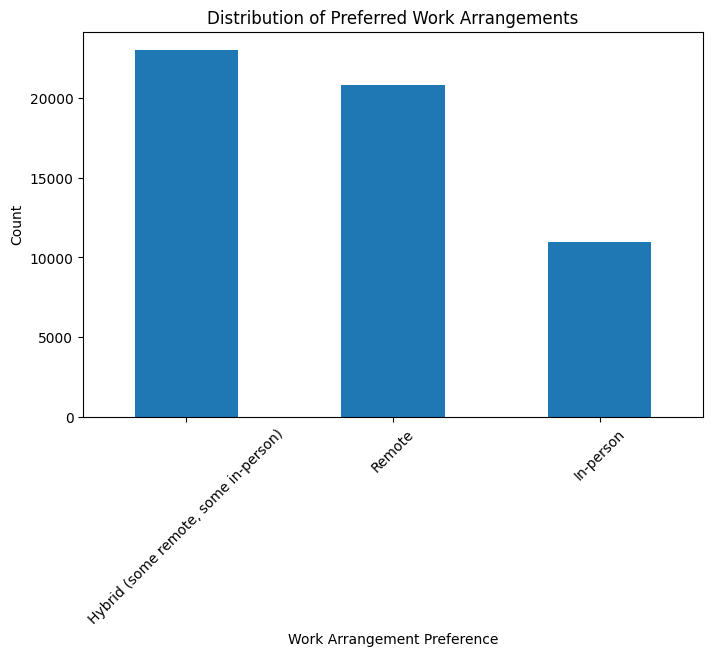

In [37]:
## Write your code here
## 3.2 Histogram of Preferred Work Locations (RemoteWork)

# 1) Extract the column
QUERY = """
SELECT RemoteWork
FROM main
WHERE RemoteWork IS NOT NULL
"""
df_remote = pd.read_sql_query(QUERY, conn)

# 2) Clean values
df_remote["RemoteWork"] = df_remote["RemoteWork"].str.strip()

# 3) Count categories
remote_counts = df_remote["RemoteWork"].value_counts()

# 4) Plot histogram (bar chart)
plt.figure(figsize=(8,5))
remote_counts.plot(kind="bar")
plt.title("Distribution of Preferred Work Arrangements")
plt.xlabel("Work Arrangement Preference")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


### 4. Visualizing Comparison of Data


**4.1 Histogram of Median CompTotal for Ages 45 to 60**


Objective: Plot the histogram for `CompTotal` within the age group 45 to 60 to analyze compensation distribution among mid-career respondents.


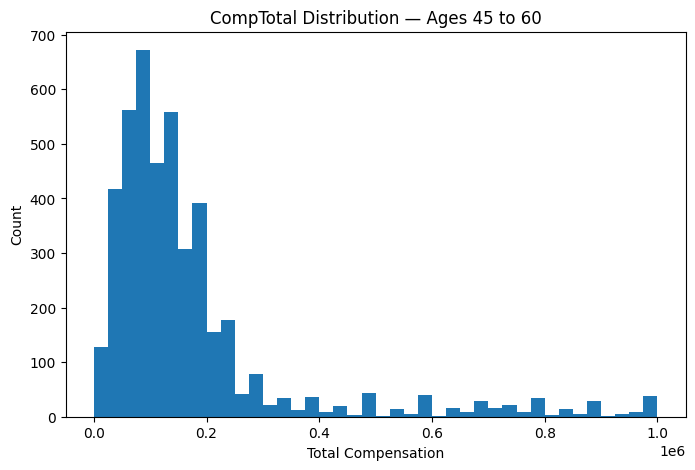

In [38]:
## Write your code here
## 4.1 Histogram of CompTotal for Ages 45 to 60

# 1) Extract Age + CompTotal
QUERY = """
SELECT Age, CompTotal
FROM main
WHERE Age IS NOT NULL AND CompTotal IS NOT NULL
"""
df_age_range = pd.read_sql_query(QUERY, conn)

# 2) Clean Age into simple labels
df_age_range["AgeGroup"] = (
    df_age_range["Age"]
        .str.replace(" years old", "", regex=False)
        .str.replace(" years or older", "+", regex=False)
)

df_age_range["AgeGroup"] = df_age_range["AgeGroup"].replace({
    "65+": "65 or older"
})

# 3) Select ages 45–60 → corresponds to "45-54" and "55-64"
valid_groups = ["45-54", "55-64"]
df_45_60 = df_age_range[df_age_range["AgeGroup"].isin(valid_groups)].copy()

# 4) Clean CompTotal
df_45_60["CompTotal"] = pd.to_numeric(df_45_60["CompTotal"], errors="coerce")
df_45_60 = df_45_60.dropna(subset=["CompTotal"])
df_45_60 = df_45_60[
    (df_45_60["CompTotal"] >= 1) &
    (df_45_60["CompTotal"] <= 1_000_000)
]

# 5) Plot histogram
plt.figure(figsize=(8,5))
plt.hist(df_45_60["CompTotal"], bins=40)
plt.title("CompTotal Distribution — Ages 45 to 60")
plt.xlabel("Total Compensation")
plt.ylabel("Count")
plt.show()


**4.2 Histogram of Job Satisfaction (`JobSat`) by YearsCodePro**


Objective: Plot the histogram for `JobSat` scores based on respondents' years of professional coding experience.


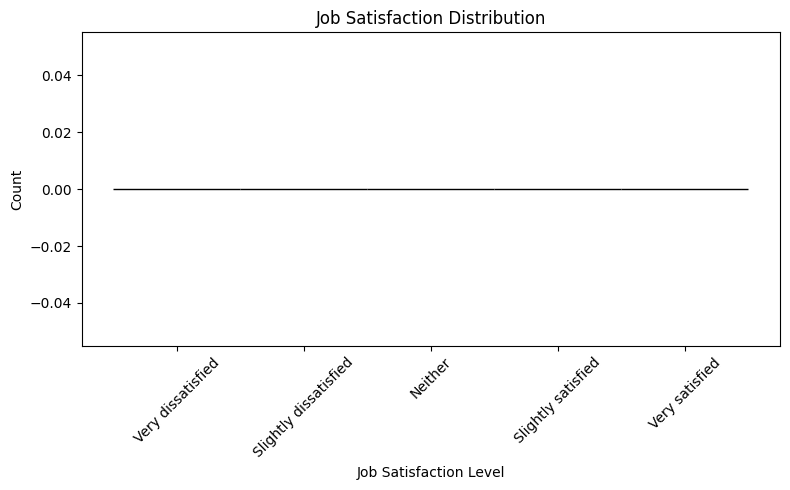

In [39]:
## Write your code here
## 4.2 Histogram of Job Satisfaction (JobSat) based on YearsCodePro

# 1) Extract JobSat + YearsCodePro
QUERY = """
SELECT JobSat, YearsCodePro
FROM main
WHERE JobSat IS NOT NULL AND YearsCodePro IS NOT NULL
"""
df_js = pd.read_sql_query(QUERY, conn)

# 2) Clean YearsCodePro (same as in Section 1.2)
df_js["YearsCodePro_clean"] = (
    df_js["YearsCodePro"]
        .replace({
            "Less than 1 year": 0.5,
            "More than 50 years": 51
        })
)

df_js["YearsCodePro_num"] = pd.to_numeric(
    df_js["YearsCodePro_clean"], errors="coerce"
)

# Drop rows that didn't convert
df_js = df_js.dropna(subset=["YearsCodePro_num"])

# 3) Map JobSat categories to numeric 1–5 scale
satisfaction_map = {
    "Very satisfied": 5,
    "Slightly satisfied": 4,
    "Neither satisfied nor dissatisfied": 3,
    "Slightly dissatisfied": 2,
    "Very dissatisfied": 1
}

df_js["JobSat_num"] = df_js["JobSat"].map(satisfaction_map)

# Drop anything unmapped (e.g., NA, Prefer not to say)
df_js = df_js.dropna(subset=["JobSat_num"])

# 4) Convert to int for clean bins
df_js["JobSat_num"] = df_js["JobSat_num"].astype(int)

# 5) Plot histogram
plt.figure(figsize=(8,5))
plt.hist(df_js["JobSat_num"], bins=[1,2,3,4,5,6], edgecolor="black", align="left")
plt.xticks([1,2,3,4,5], [
    "Very dissatisfied",
    "Slightly dissatisfied",
    "Neither",
    "Slightly satisfied",
    "Very satisfied"
], rotation=45)
plt.title("Job Satisfaction Distribution")
plt.xlabel("Job Satisfaction Level")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


In [40]:
QUERY = """
SELECT JobSat
FROM main
WHERE JobSat IS NOT NULL
LIMIT 30
"""
pd.read_sql_query(QUERY, conn)


,JobSat
0,8.0
1,8.0
2,5.0
3,10.0
4,6.0
5,9.0
6,4.0
7,7.0
8,7.0
9,7.0


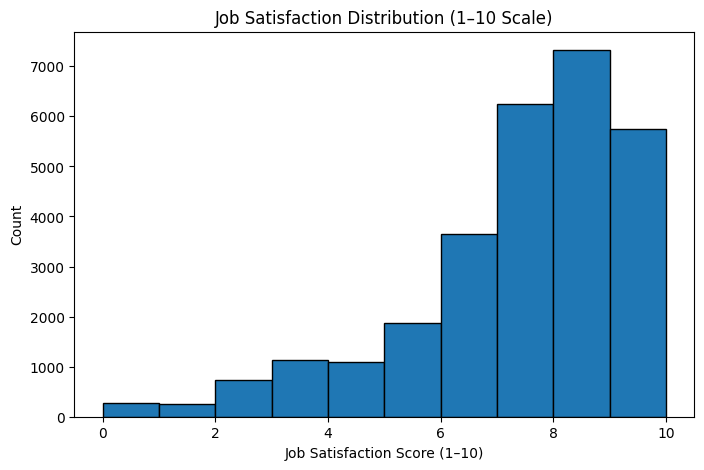

In [42]:
## 4.2 Histogram of Job Satisfaction (numeric 1–10 scale)

# 1) Extract JobSat + YearsCodePro
QUERY = """
SELECT JobSat, YearsCodePro
FROM main
WHERE JobSat IS NOT NULL AND YearsCodePro IS NOT NULL
"""
df_js = pd.read_sql_query(QUERY, conn)

# 2) Convert JobSat to numeric (it already is, but this ensures consistency)
df_js["JobSat_num"] = pd.to_numeric(df_js["JobSat"], errors="coerce")

# Drop missing or invalid
df_js = df_js.dropna(subset=["JobSat_num"])

# 3) Clean YearsCodePro (same logic as earlier)
df_js["YearsCodePro_clean"] = (
    df_js["YearsCodePro"]
        .replace({
            "Less than 1 year": 0.5,
            "More than 50 years": 51
        })
)

df_js["YearsCodePro_num"] = pd.to_numeric(
    df_js["YearsCodePro_clean"], errors="coerce"
)

df_js = df_js.dropna(subset=["YearsCodePro_num"])

# 4) Plot histogram of Job Satisfaction
plt.figure(figsize=(8,5))
plt.hist(df_js["JobSat_num"], bins=10, edgecolor='black')
plt.title("Job Satisfaction Distribution (1–10 Scale)")
plt.xlabel("Job Satisfaction Score (1–10)")
plt.ylabel("Count")
plt.show()


### Final step: Close the database connection


Once you've completed the lab, make sure to close the connection to the SQLite database:



In [43]:
conn.close()

### Summary


In this lab, you used histograms to visualize various aspects of the dataset, focusing on:

- Distribution of compensation, coding experience, and work hours.

- Relationships in compensation across age groups and work status.

- Composition of data by desired databases and work environments.

- Comparisons of job satisfaction across years of experience.

Histograms helped reveal patterns and distributions in the data, enhancing your understanding of developer demographics and preferences.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


Copyright © IBM Corporation. All rights reserved.
